<a href="https://colab.research.google.com/github/OussamaBenakmoum/Patch_Camelyon-Classification/blob/main/Projet_BDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries

from tensorflow import keras
import tensorflow as tf
import os,datetime
import tensorflow_datasets as tfds

#Loading the data from tensorflow_datasets
df, info = tfds.load('patch_camelyon', with_info = True, as_supervised = True)

#Getting the train, validation and test data
train_data = df['train']
valid_data = df['validation']
test_data = df['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteVOENIL/patch_camelyon-test.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteVOENIL/patch_camelyon-train.tfrecord


  0%|          | 0/262144 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteVOENIL/patch_camelyon-validation.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [ ]:
info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

In [ ]:
class_names = info.features["label"].names
class_names

['0', '1']

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(96, 96, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_one_sample:
  print(f"""
  Image Shape : {image.shape},
  Image dtype : {image.dtype},
  Label : {label},
  Label name : {class_names[label]}
  """)


  Image Shape : (96, 96, 3),
  Image dtype : <dtype: 'uint8'>,
  Label : 0,
  Label name : 0
  


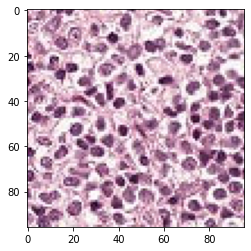

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [ ]:
#A function to help scale the images
def preprocess(image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, labels

#Applying the preprocess function we the use of map() method
train_data = train_data.map(preprocess)
valid_data = valid_data.map(preprocess)
test_data = test_data.map(preprocess)

#Shuffling the train_data
buffer_size = 1000
train_data = train_data.shuffle(buffer_size)

#Batching and prefetching
batch_size = 128
train_data = train_data.batch(batch_size).prefetch(1)
valid_data = valid_data.batch(batch_size).prefetch(1)
test_data = test_data.batch(batch_size).prefetch(1)

In [ ]:
#Seperating image and label into different variables
train_images, train_labels = next(iter(train_data))
valid_images, valid_labels = next(iter(valid_data))
test_images, test_labels  = next(iter(test_data))

#Checking the label shape
valid_labels.shape

#Checking the image shape
train_images.shape

TensorShape([128, 96, 96, 3])

In [ ]:

#import the necessary libraries
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

model = Sequential([
                    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform', activation='relu', input_shape = [96, 96, 3]),
                    MaxPooling2D(2),
                    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(512, 3,padding='same',kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(512, 3,padding='same',kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(1024, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(1024, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(1028,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(512,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(1, activation = 'sigmoid'),
                    ])
 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 512)      0

In [ ]:
#Compiling our model
model.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

#Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Fitting our model
history = model.fit( train_images, train_labels, epochs = 10, callbacks=[early_stopping_cb], validation_data = (valid_images, valid_labels), verbose=2)

Epoch 1/10
4/4 - 70s - loss: 2.4047 - acc: 0.5391 - val_loss: 0.7529 - val_acc: 0.5859 - 70s/epoch - 17s/step
Epoch 2/10
4/4 - 61s - loss: 0.8688 - acc: 0.5391 - val_loss: 0.7776 - val_acc: 0.5859 - 61s/epoch - 15s/step
Epoch 3/10
4/4 - 61s - loss: 0.8629 - acc: 0.5625 - val_loss: 0.6716 - val_acc: 0.6641 - 61s/epoch - 15s/step
Epoch 4/10
4/4 - 61s - loss: 0.7369 - acc: 0.5547 - val_loss: 0.9102 - val_acc: 0.4141 - 61s/epoch - 15s/step
Epoch 5/10
4/4 - 61s - loss: 0.7117 - acc: 0.6328 - val_loss: 0.6367 - val_acc: 0.6719 - 61s/epoch - 15s/step
Epoch 6/10
4/4 - 61s - loss: 0.6380 - acc: 0.6094 - val_loss: 0.7350 - val_acc: 0.4219 - 61s/epoch - 15s/step
Epoch 7/10
4/4 - 61s - loss: 0.6719 - acc: 0.6016 - val_loss: 0.5963 - val_acc: 0.7188 - 61s/epoch - 15s/step
Epoch 8/10
4/4 - 61s - loss: 0.6648 - acc: 0.5938 - val_loss: 0.6762 - val_acc: 0.5781 - 61s/epoch - 15s/step
Epoch 9/10
4/4 - 61s - loss: 0.6017 - acc: 0.6562 - val_loss: 0.6533 - val_acc: 0.5938 - 61s/epoch - 15s/step
Epoch 10/1

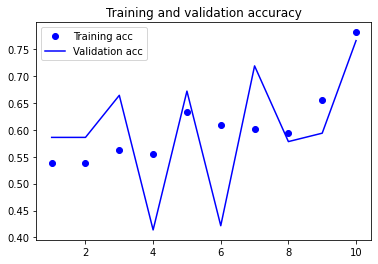

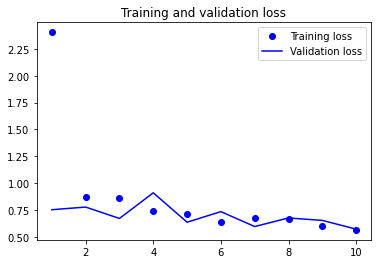

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

4/4 [==============================] - 11s 3s/step - loss: 0.5935 - acc: 0.7812


[0.5934699773788452, 0.78125]